# Performing Musical Data Analysis Using Spotify

## Part 1: Data pre-processing
Before any analysis can be performed, the data must be loaded and converted to a data frame. The following code loads every song an artist has produced and places it, along with its accompanying album and audio features into a pandas dataframe. In this case Muse is used, but simply changing the artist code will allow this to work for any artist on spotify

In [36]:
# Libraries used
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Read spotify api credentials from a file
with open('credentials.json') as f:
  data = json.load(f)

In [4]:
# authenticate the api
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=data['CLIENT_ID'],
                                                          client_secret=data['CLIENT_SECRET']))


In [106]:
#Get Album names and URIS
artist_uri = "spotify:artist:12Chz98pHFMPJEknJQMWvI"
results = sp.artist_albums(artist_uri, album_type='album')
album_names = []
album_uris = []
for i in results['items']:
    album_names.append(i['name'])
    album_uris.append(i['uri'])
album_names

['Simulation Theory (Super Deluxe)',
 'Drones',
 'Drones',
 'Live at Rome Olympic Stadium',
 'The 2nd Law',
 'The Resistance',
 'HAARP (Live from Wembley Stadium)',
 'HAARP (Live from Wembley Stadium)',
 'Black Holes and Revelations',
 'Absolution',
 'Hullabaloo Soundtrack (Eastwest Release)',
 'Origin of Symmetry',
 'Origin of Symmetry',
 'Showbiz']

Notice the duplicates in the albums list. In order to perform more accurate analysis, they must be removed. The following code does that.

In [107]:
#Remove duplicates
albums_unique = set()
for idx, val in enumerate(album_names):
    if val in albums_unique:
        album_names.pop(idx)
        album_uris.pop(idx)
    else:
        albums_unique.add(val)
print(album_names)
print(album_uris)

['Simulation Theory (Super Deluxe)', 'Drones', 'Live at Rome Olympic Stadium', 'The 2nd Law', 'The Resistance', 'HAARP (Live from Wembley Stadium)', 'Black Holes and Revelations', 'Absolution', 'Hullabaloo Soundtrack (Eastwest Release)', 'Origin of Symmetry', 'Showbiz']
['spotify:album:5OZgDtx180ZZPMpm36J2zC', 'spotify:album:7iXImlGs9MxR7VTSNkO2Go', 'spotify:album:2m7L60M210ABzrY9GLyBPZ', 'spotify:album:3KuXEGcqLcnEYWnn3OEGy0', 'spotify:album:0eFHYz8NmK75zSplL5qlfM', 'spotify:album:2EcBoQ1Hb39hgSUEgrtR3j', 'spotify:album:0lw68yx3MhKflWFqCsGkIs', 'spotify:album:0HcHPBu9aaF1MxOiZmUQTl', 'spotify:album:5eJTvSeghTKoqN3Ly4TqEf', 'spotify:album:1AP6uGYHdakRgwuWQsP5pK', 'spotify:album:6AyUVv7MnxxTuijp4WmrhO']


In [108]:
#Create ordered lists of songs and albums as well as a dictionary mapping song_names to uris for later use
songs = []
albums_ordered = []
dictOfSongUris = {}
for idx, val in enumerate(album_names):
    res = sp.album_tracks(album_uris[idx])
    for j in res['items']:
        songs.append(j['name'])
        albums_ordered.append(val)
        dictOfSongUris[j['name']] = j['uri']  

    

In [109]:
#Extract the audio features
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []
for song in songs:
    #print(dictOfSongUris[song])
    features = sp.audio_features([dictOfSongUris[song]])
    danceability.append(features[0]['danceability'])
    energy.append(features[0]['energy'])
    key.append(features[0]['key'])
    loudness.append(features[0]['loudness'])
    mode.append(features[0]['mode'])
    speechiness.append(features[0]['speechiness'])
    acousticness.append(features[0]['acousticness'])
    instrumentalness.append(features[0]['instrumentalness'])
    liveness.append(features[0]['liveness'])
    valence.append(features[0]['valence'])
    tempo.append(features[0]['tempo'])
    duration_ms.append(features[0]['duration_ms'])
    time_signature.append(features[0]['time_signature'])
d = zip(songs, albums_ordered, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, 
       valence, tempo, duration_ms, time_signature)

This code looks messy (because it is), but all it is doing is creating lists of all the audio features associated with each song. The lists are then joined together into tuples via Pythons zip() function so that a dataframe can be made.

In [110]:
# Build Dataframe
df = pd.DataFrame(list(d), columns=['Song Name', 'Album Name', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
                                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration (MS)', 'Time Signature'])

In [111]:
df.head(15)

,Song Name,Album Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (MS),Time Signature
0,Algorithm,Simulation Theory (Super Deluxe),0.522,0.923,2,-4.560,1,0.0539,0.012500,0.017000,0.0854,0.5950,170.057,245960,4
1,The Dark Side,Simulation Theory (Super Deluxe),0.484,0.927,2,-3.759,1,0.0425,0.000884,0.000004,0.2230,0.3890,99.979,227213,4
2,Pressure,Simulation Theory (Super Deluxe),0.622,0.842,11,-3.678,0,0.0609,0.003420,0.000140,0.0575,0.7240,136.041,235600,4
3,Propaganda,Simulation Theory (Super Deluxe),0.754,0.675,2,-4.616,1,0.0939,0.025100,0.004190,0.5130,0.4320,95.024,180507,4
4,Break It to Me,Simulation Theory (Super Deluxe),0.667,0.967,1,-0.759,0,0.0939,0.157000,0.258000,0.0596,0.6140,90.015,217560,4
5,Something Human,Simulation Theory (Super Deluxe),0.590,0.903,9,-4.841,1,0.0542,0.053600,0.002890,0.1200,0.5450,105.018,226787,4
6,Thought Contagion,Simulation Theory (Super Deluxe),0.480,0.760,5,-3.663,1,0.0402,0.001070,0.000024,0.0809,0.3780,139.985,206107,4
7,Get up and Fight,Simulation Theory (Super Deluxe),0.646,0.846,4,-5.654,1,0.0356,0.004300,0.000014,0.1050,0.8700,135.014,244720,4
8,Blockades,Simulation Theory (Super Deluxe),0.498,0.941,7,-4.454,0,0.0878,0.000644,0.023600,0.3400,0.2360,127.044,230680,4
9,Dig Down,Simulation Theory (Super Deluxe),0.428,0.429,0,-6.060,1,0.0490,0.087900,0.000410,0.1680,0.1820,127.173,228147,4


In [27]:
# Write the dataframe to a csv file
df.to_csv('muse_features.csv')

## Part 2: Data Analysis

TODO

In [112]:
df.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (MS),Time Signature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.376355,0.739015,4.923567,-7.101752,0.643312,0.064159,0.145918,0.192326,0.348231,0.269166,121.640389,260448.261146,3.923567
std,0.165542,0.223688,3.610067,3.506079,0.480554,0.053179,0.264282,0.291273,0.316737,0.197871,27.850470,75649.300919,0.400983
min,0.080700,0.070400,0.000000,-29.015000,0.000000,0.026500,0.000006,0.000000,0.028300,0.000000,72.090000,21148.000000,1.000000
25%,0.238000,0.571000,2.000000,-7.985000,0.000000,0.036900,0.000386,0.001540,0.110000,0.099900,96.393000,226787.000000,4.000000
50%,0.366000,0.817000,5.000000,-6.215000,1.000000,0.050200,0.008560,0.031200,0.181000,0.213000,121.602000,258066.000000,4.000000
75%,0.487000,0.920000,9.000000,-5.018000,1.000000,0.067000,0.157000,0.246000,0.576000,0.397000,138.661000,297000.000000,4.000000
max,0.828000,0.989000,11.000000,-0.759000,1.000000,0.472000,0.944000,0.968000,0.993000,0.870000,186.177000,499373.000000,5.000000


In [113]:
# Extract mean values by album and drop categorical variables
temp_album_names = album_names
temp_album_names.reverse()
mean_vals = df.groupby(['Album Name']).mean()
mean_vals = mean_vals.drop(['Key','Mode', 'Time Signature'], axis=1)
mean_vals = mean_vals.reindex(temp_album_names)
mean_vals

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (MS)
Album Name,,,,,,,,,,
Showbiz,0.339692,0.630000,-7.666538,0.050423,0.151143,0.045755,0.172438,0.229792,112.943538,251307.461538
Origin of Symmetry,0.309500,0.721833,-7.342083,0.051158,0.092083,0.263317,0.152858,0.230458,129.556417,275547.000000
Hullabaloo Soundtrack (Eastwest Release),0.304376,0.777524,-7.494095,0.064205,0.051580,0.456791,0.555029,0.234224,112.436714,266113.904762
Absolution,0.369427,0.635493,-9.614533,0.052240,0.292183,0.205672,0.176140,0.249047,127.477733,228875.533333
Black Holes and Revelations,0.414000,0.803167,-5.711250,0.067025,0.138813,0.044934,0.225192,0.365425,119.676417,251302.916667
HAARP (Live from Wembley Stadium),0.270800,0.860067,-7.025933,0.094400,0.108245,0.264820,0.621000,0.177020,125.396267,308280.666667
The Resistance,0.368709,0.647455,-6.908182,0.045664,0.081989,0.283002,0.120518,0.215118,134.793455,296299.272727
The 2nd Law,0.388900,0.707231,-6.480538,0.057477,0.144436,0.245904,0.186015,0.285992,126.626231,247381.615385
Live at Rome Olympic Stadium,0.398692,0.866385,-6.342538,0.055846,0.028198,0.116163,0.899769,0.211492,125.926154,298341.538462


[Text(0, 0, 'Showbiz'),
 Text(0, 0, 'Origin of Symmetry'),
 Text(0, 0, 'Hullabaloo Soundtrack (Eastwest Release)'),
 Text(0, 0, 'Absolution'),
 Text(0, 0, 'Black Holes and Revelations'),
 Text(0, 0, 'HAARP (Live from Wembley Stadium)'),
 Text(0, 0, 'The Resistance'),
 Text(0, 0, 'The 2nd Law'),
 Text(0, 0, 'Live at Rome Olympic Stadium'),
 Text(0, 0, 'Drones'),
 Text(0, 0, 'Simulation Theory (Super Deluxe)')]

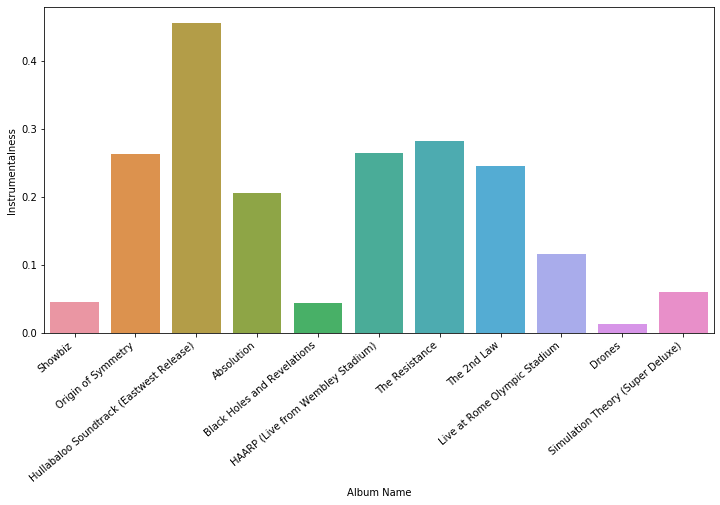

In [116]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=mean_vals.index, y='Instrumentalness', data=mean_vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


In [ ]:
def banger_score(energy, loudness, tempo, acousticness):
    return sigmoid(energy * loudness + tempo - 